In [108]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
dataset = pd.read_csv(r'C:\Users\Ab215tx\Desktop\keras-frcnn-master\MOT1709new.csv',skiprows=0,header=None)
print(dataset.head())

   0   1     2    3    4    5  6  7        8
0  1   1   260  450  102  262  1  1  1.00000
1  1  19  1686  387  171  345  1  1  1.00000
2  1  20  1886  327  156  404  1  1  0.22293
3  1  21  1253  533   63  129  1  1  1.00000
4  1  22  1292  459   70  202  1  1  0.77624


In [110]:
dataset.drop(dataset.columns[[6,7,8]], axis=1, inplace=True)
dataset.columns =['Frame','class','x','y','width','height']
print(dataset.head())

   Frame  class     x    y  width  height
0      1      1   260  450    102     262
1      1     19  1686  387    171     345
2      1     20  1886  327    156     404
3      1     21  1253  533     63     129
4      1     22  1292  459     70     202


In [96]:
#dataset['xmin'] = dataset['bb_left']
#dataset['xmax'] = dataset['bb_left'] + dataset['width']
#dataset['ymin'] = dataset['bb_top'] - dataset['height']
#dataset['ymax'] = dataset['bb_top'] 

KeyError: 'bb_top'

In [81]:
#print(dataset.head())

   Frame  class  bb_left  bb_top  width  height  xmin  xmax  ymin  ymax
0      1      1      260     450    102     262   260   362   188   450
1      1     19     1686     387    171     345  1686  1857    42   387
2      1     20     1886     327    156     404  1886  2042   -77   327
3      1     21     1253     533     63     129  1253  1316   404   533
4      1     22     1292     459     70     202  1292  1362   257   459


In [82]:
#dataset.drop(dataset.columns[[2,3,4,5]], axis=1, inplace=True)
#dataset.columns =['Frame','class','xmin','xmax','ymin','ymax']
#print(dataset.head())

   Frame  class  xmin  xmax  ymin  ymax
0      1      1   260   362   188   450
1      1     19  1686  1857    42   387
2      1     20  1886  2042   -77   327
3      1     21  1253  1316   404   533
4      1     22  1292  1362   257   459


In [111]:
train = pd.DataFrame(dataset)
print(train.head())

   Frame  class     x    y  width  height
0      1      1   260  450    102     262
1      1     19  1686  387    171     345
2      1     20  1886  327    156     404
3      1     21  1253  533     63     129
4      1     22  1292  459     70     202


In [63]:
#output = {'xmin' : xmin, 'xmax' : xmax, 'ymin' : ymin, 'ymax' : ymax, 'ID':id }
#output['Frame'] = dataset.iloc[:,0]
#train= pd.DataFrame(output)
#train.insert(6, 'Classs',1)
#print(train.head())
#print(len(train))

In [112]:
for i in range(len(train)):
    train.iloc[i,0] = "datanew/"+"frame"+str(train.iloc[i,0]-1)+".jpg"
print(train.head(20))

                 Frame  class     x    y  width  height
0   datanew/frame0.jpg      1   260  450    102     262
1   datanew/frame0.jpg     19  1686  387    171     345
2   datanew/frame0.jpg     20  1886  327    156     404
3   datanew/frame0.jpg     21  1253  533     63     129
4   datanew/frame0.jpg     22  1292  459     70     202
5   datanew/frame0.jpg     23  -348  235    477     695
6   datanew/frame0.jpg     25  1035  174    136     532
7   datanew/frame0.jpg     26   116  522     84     230
8   datanew/frame0.jpg     27   234  395     21     440
9   datanew/frame0.jpg     28  1682  470     65     122
10  datanew/frame0.jpg     30    42  502     85     254
11  datanew/frame0.jpg     31   863  522     46     108
12  datanew/frame0.jpg     44   751  506     95     182
13  datanew/frame1.jpg      1   262  449    102     263
14  datanew/frame1.jpg     19  1685  386    170     347
15  datanew/frame1.jpg     20  1883  326    157     406
16  datanew/frame1.jpg     21  1256  534     62 

In [65]:
train['Frame'].nunique()

525

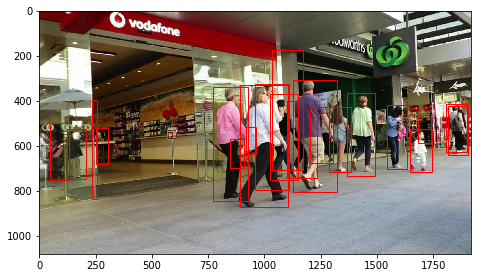

In [116]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('datanew/frame258.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.Frame == "datanew/frame258.jpg"].iterrows():
    x = row.x
    y = row.y
    width = row.width
    height = row.height
    
    #width = xmax - xmin
    #height = ymax - ym
    
    edgecolor = 'r'
    
    # assign different color to different classes of objects
    #if row.class == str(1):
        #edgecolor = 'r'
        #ax.annotate('RBC', xy=(xmax-40,ymin+20))
    #elif row.class == str(19):
        #edgecolor = 'b'
        #ax.annotate('WBC', xy=(xmax-40,ymin+20))
    #elif row.class == str(20):
        #edgecolor = 'g'
        #ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((x,y), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [114]:
train.to_csv('annotatenewnew.txt',header=None,index=None, sep=',')